# Get subset data for next steps
- Here we bring in the data to examine time as a feature for consideration.
- we remove all highly correlated features
- we also examine the distribution of features of interest to decide whether further transformation is needed
- we save the subset feature for modeling

In [43]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix,accuracy_score

import numpy as np

In [2]:
baseline_df = pd.read_csv('./baseline_data_with_event_and_trans_time.csv')

In [3]:
baseline_df.head()

,RID,VISCODE,DXCHANGE,DXCURREN,DXCONV,DXCONTYP,DXREV,DXNORM,DXNODEP,DXMCI,...,TAU_scaled,PTAU_scaled,TOTAL11_scaled,TOTALMOD_scaled,APGEN1_scaled,APGEN2_scaled,MMSCORE_scaled,Event,time,AGE
0,514,bl,NaN,2.0,0.0,-4.0,-4.0,-4.0,-4.0,1.0,...,-1.550,-1.492,-2.305,-2.320,0.064,-0.937,0.209,1,48.0,97.0
1,3,bl,NaN,3.0,0.0,-4.0,-4.0,-4.0,-4.0,-4.0,...,-0.590,-0.574,2.065,1.996,0.064,1.067,-1.042,1,48.0,98.0
2,516,bl,NaN,1.0,0.0,-4.0,-4.0,1.0,-4.0,-4.0,...,0.124,-0.073,-0.636,-0.629,0.064,-0.937,0.418,0,NaN,104.0
3,5,bl,NaN,1.0,0.0,-4.0,-4.0,1.0,-4.0,-4.0,...,0.235,0.210,-0.733,-0.697,0.064,-0.937,0.835,1,48.0,91.0
4,1030,bl,NaN,2.0,0.0,-4.0,-4.0,-4.0,-4.0,1.0,...,0.737,0.683,-1.028,-0.490,0.064,-0.937,0.626,1,48.0,83.0


# Distribution of Age compared to what was read in from ADNI website

- The ages beyond 90 maybe a concern so perhaps cutting off age at below 100 may make sense.
- The distribution from ADNI website shown in ADNI EDA notebook shows some age byond 89 but not that many

<AxesSubplot:ylabel='Frequency'>

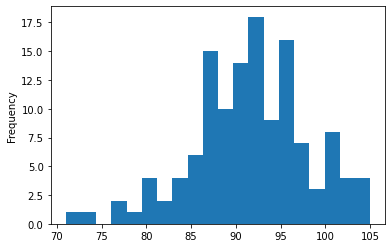

In [7]:
baseline_df['AGE'].plot(kind='hist', bins = 20)

## With the age cut off at 100, the distribution stil skews left as the original

<AxesSubplot:ylabel='Frequency'>

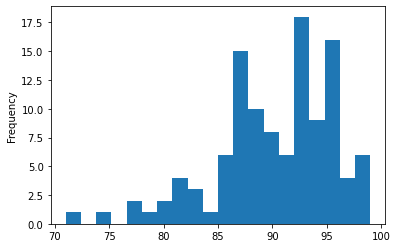

In [8]:
baseline_df[baseline_df['AGE']<100]['AGE'].plot(kind='hist', bins = 20)

In [10]:
baseline_df.columns

Index(['RID', 'VISCODE', 'DXCHANGE', 'DXCURREN', 'DXCONV', 'DXCONTYP', 'DXREV',
       'DXNORM', 'DXNODEP', 'DXMCI', 'DXMDES', 'DXMPTR1', 'DXMPTR2', 'DXMPTR3',
       'DXMPTR4', 'DXMPTR5', 'DXMPTR6', 'DXMDUE', 'DXMOTHET', 'DXMOTHSP',
       'DXDSEV', 'DXDDUE', 'DXAD', 'DXADES', 'DXAPP', 'DXAPROB', 'DXAMETASP',
       'DXAOTHRSP', 'DXAPOSS', 'DXAATYSP', 'DXAMETSP', 'DXAOTHSP', 'DXPARK',
       'DXPARKSP', 'DXPDES', 'DXPCOG', 'DXPATYP', 'DXPOTHSP', 'DXDEP',
       'DXDEPSP', 'DXOTHDEM', 'DXODES', 'DXOOTHSP', 'DXCONFID', 'DIAGNOSIS',
       'PTSOURCE', 'PTGENDER', 'PTDOBMM', 'PTDOBYY', 'PTHAND', 'PTMARRY',
       'PTEDUCAT', 'PTWORKHS', 'PTWORK', 'PTWRECNT', 'PTNOTRT', 'PTRTYR',
       'PTHOME', 'PTOTHOME', 'PTTLANG', 'PTPLANG', 'PTPSPEC', 'PTCOGBEG',
       'PTMCIBEG', 'PTADBEG', 'PTADDX', 'PTETHCAT', 'PTRACCAT', 'RUNDATE',
       'ABETA142', 'PTAU181P', 'TAU', 'ADAS11', 'TOTALMOD', 'APOE4', 'APGEN2',
       'MMSE_bl', 'rtaubeta', 'rptaubeta', 'ABETA_scaled', 'TAU_scaled',
       'PTAU_s

In [15]:
baseline_df['PTADBEG'].value_counts()

-4.0       96
 2004.0     9
 2001.0     5
 1999.0     3
 2000.0     3
 2003.0     3
 2006.0     2
 2002.0     2
 1998.0     2
 2005.0     2
 1996.0     1
 1997.0     1
Name: PTADBEG, dtype: int64

## Apoe4 distributions
- here we have two versions of Apoe4 similar in distributions but with an obvious shift. 
- we will drop APGEN1 from further consideration because it has fewer  coverage

In [21]:
baseline_df[['APGEN1_scaled','APGEN2_scaled']].describe()

,APGEN1_scaled,APGEN2_scaled
count,129.000000,129.000000
mean,0.121543,0.150442
std,1.093802,1.002243
min,-2.415000,-0.937000
25%,0.064000,-0.937000
50%,0.064000,1.067000
75%,0.064000,1.067000
max,2.542000,1.067000


<AxesSubplot:ylabel='Frequency'>

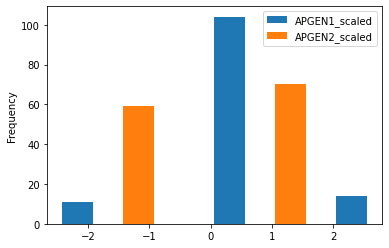

In [20]:
baseline_df[['APGEN1_scaled','APGEN2_scaled']].plot(kind='hist', bins=10)

## Time distribution

- very little variance may not useful for predicting event. We will include and drop to see the effect

<AxesSubplot:ylabel='Frequency'>

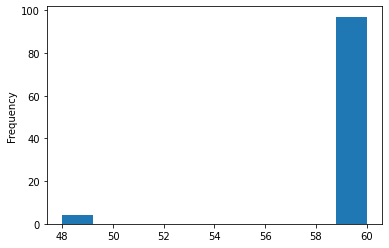

In [22]:
baseline_df['time'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

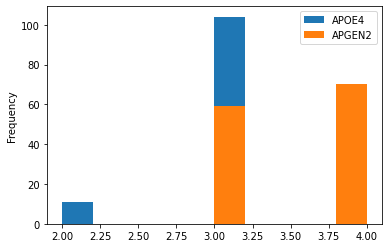

In [23]:
baseline_df[['APOE4', 'APGEN2']].plot(kind='hist')

In [28]:
baseline_df[['MMSE_bl', 'rtaubeta', 'rptaubeta',
       'TOTAL11_scaled', 'TOTALMOD_scaled', 'APGEN1_scaled',
       'MMSCORE_scaled', 'AGE','time']].corr()

,MMSE_bl,rtaubeta,rptaubeta,TOTAL11_scaled,TOTALMOD_scaled,APGEN1_scaled,MMSCORE_scaled,AGE,time
MMSE_bl,1.000000,-0.320846,-0.308667,-0.550848,-0.580879,-0.195501,1.000000,-0.019375,0.056013
rtaubeta,-0.320846,1.000000,0.991347,0.258032,0.297257,0.381545,-0.320849,-0.109744,0.065058
rptaubeta,-0.308667,0.991347,1.000000,0.241118,0.278096,0.374351,-0.308666,-0.119953,0.067325
TOTAL11_scaled,-0.550848,0.258032,0.241118,1.000000,0.949203,0.270228,-0.550848,-0.042799,0.146769
TOTALMOD_scaled,-0.580879,0.297257,0.278096,0.949203,1.000000,0.290880,-0.580873,-0.054587,0.134737
APGEN1_scaled,-0.195501,0.381545,0.374351,0.270228,0.290880,1.000000,-0.195510,0.031001,0.009027
MMSCORE_scaled,1.000000,-0.320849,-0.308666,-0.550848,-0.580873,-0.195510,1.000000,-0.019406,0.056063
AGE,-0.019375,-0.109744,-0.119953,-0.042799,-0.054587,0.031001,-0.019406,1.000000,-0.018791
time,0.056013,0.065058,0.067325,0.146769,0.134737,0.009027,0.056063,-0.018791,1.000000


In [29]:
baseline_df[['PTHOME', 'PTETHCAT', 'PTRACCAT',
       'MMSE_bl', 'rtaubeta', 'rptaubeta',
       'TOTAL11_scaled', 'TOTALMOD_scaled', 'APGEN1_scaled',
       'MMSCORE_scaled', 'AGE', 'Event', 'time']].head()

,PTHOME,PTETHCAT,PTRACCAT,MMSE_bl,rtaubeta,rptaubeta,TOTAL11_scaled,TOTALMOD_scaled,APGEN1_scaled,MMSCORE_scaled,AGE,Event,time
0,5.0,2.0,5.0,26.0,0.153120,0.012591,-2.305,-2.320,0.064,0.209,97.0,1,48.0
1,3.0,2.0,5.0,20.0,0.323264,0.030789,2.065,1.996,0.064,-1.042,98.0,1,48.0
2,1.0,2.0,5.0,27.0,0.174140,0.015914,-0.636,-0.629,0.064,0.418,104.0,0,NaN
3,1.0,2.0,5.0,29.0,0.615750,0.061082,-0.733,-0.697,0.064,0.835,91.0,1,48.0
4,1.0,2.0,5.0,28.0,0.459416,0.046173,-1.028,-0.490,0.064,0.626,83.0,1,48.0


In [36]:
baseline_df[['PTHOME', 'PTETHCAT', 'PTRACCAT',
       'MMSE_bl', 'rtaubeta', 'rptaubeta',
       'TOTAL11_scaled', 'TOTALMOD_scaled', 'APGEN1_scaled',
       'MMSCORE_scaled', 'AGE', 'Event', 'time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PTHOME           129 non-null    float64
 1   PTETHCAT         129 non-null    float64
 2   PTRACCAT         129 non-null    float64
 3   MMSE_bl          129 non-null    float64
 4   rtaubeta         129 non-null    float64
 5   rptaubeta        129 non-null    float64
 6   TOTAL11_scaled   129 non-null    float64
 7   TOTALMOD_scaled  129 non-null    float64
 8   APGEN1_scaled    129 non-null    float64
 9   MMSCORE_scaled   129 non-null    float64
 10  AGE              129 non-null    float64
 11  Event            129 non-null    int64  
 12  time             101 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 13.2 KB


In [41]:
def impute_num_feature(df_use, num_features_list):
    
    df = df_use
    
    for var in num_features_list:
        
        check = sum(df[var].isnull())
        
        if check is not None:
            
            use_median = df[var].median()
            
            df[var] = df[var].replace(np.nan,use_median)
            
        else:
            
            pass
        
    return df

In [44]:
baseline_df2 = impute_num_feature(baseline_df, ['time'])

In [46]:
baseline_df2[['PTHOME', 'PTETHCAT', 'PTRACCAT',
       'MMSE_bl', 'rtaubeta', 'rptaubeta',
       'TOTAL11_scaled', 'TOTALMOD_scaled', 'APGEN1_scaled',
       'MMSCORE_scaled', 'AGE', 'Event', 'time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PTHOME           129 non-null    float64
 1   PTETHCAT         129 non-null    float64
 2   PTRACCAT         129 non-null    float64
 3   MMSE_bl          129 non-null    float64
 4   rtaubeta         129 non-null    float64
 5   rptaubeta        129 non-null    float64
 6   TOTAL11_scaled   129 non-null    float64
 7   TOTALMOD_scaled  129 non-null    float64
 8   APGEN1_scaled    129 non-null    float64
 9   MMSCORE_scaled   129 non-null    float64
 10  AGE              129 non-null    float64
 11  Event            129 non-null    int64  
 12  time             129 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 13.2 KB


In [31]:
feature_use = ['PTHOME', 'PTETHCAT', 'PTRACCAT',
       'MMSE_bl', 'rtaubeta', 'rptaubeta',
       'TOTAL11_scaled', 'TOTALMOD_scaled', 'APGEN1_scaled',
       'MMSCORE_scaled', 'AGE', 'time']

target = 'Event'

## Get the features and target for next steps

- we dropped all the correlated features post feature engineering

- we also imputed the missing time with the median

In [50]:
baseline_df_use = baseline_df2[['PTHOME', 'PTETHCAT', 'PTRACCAT',
       'MMSE_bl', 'rtaubeta', 'rptaubeta',
       'TOTAL11_scaled', 'TOTALMOD_scaled', 'APGEN1_scaled',
       'MMSCORE_scaled', 'AGE', 'Event', 'time']]

In [51]:
x = baseline_df_use.drop(target, axis=1)
y = baseline_df_use[target]

### Sanity check

In [52]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PTHOME           129 non-null    float64
 1   PTETHCAT         129 non-null    float64
 2   PTRACCAT         129 non-null    float64
 3   MMSE_bl          129 non-null    float64
 4   rtaubeta         129 non-null    float64
 5   rptaubeta        129 non-null    float64
 6   TOTAL11_scaled   129 non-null    float64
 7   TOTALMOD_scaled  129 non-null    float64
 8   APGEN1_scaled    129 non-null    float64
 9   MMSCORE_scaled   129 non-null    float64
 10  AGE              129 non-null    float64
 11  time             129 non-null    float64
dtypes: float64(12)
memory usage: 12.2 KB


In [55]:
y

0      1
1      1
2      0
3      1
4      1
      ..
124    0
125    1
126    1
127    0
128    1
Name: Event, Length: 129, dtype: int64

# 1a. Fit a logistic regression with time
- this uses all the features to predict including and excluding time 
- the fscore, recal (sensitivity and precision) are all above 80% for the event class but not so good for the no event class.
- this is due to class imbalance so we can use some techniques to help create a balance to improve the classification.

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

logmodel = LogisticRegression()

logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)

print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))

print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.83      0.95      0.89        21

    accuracy                           0.81        26
   macro avg       0.67      0.58      0.59        26
weighted avg       0.77      0.81      0.77        26

[[ 1  4]
 [ 1 20]]
0.8076923076923077


/Users/leslieappiah/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [61]:
[target]+ ['time']

['Event', 'time']

# 1b. Logistic regression with no time

In [62]:
x_no_time = baseline_df_use.drop([target]+ ['time'], axis=1)

### sanity check 

In [63]:
x_no_time.columns

Index(['PTHOME', 'PTETHCAT', 'PTRACCAT', 'MMSE_bl', 'rtaubeta', 'rptaubeta',
       'TOTAL11_scaled', 'TOTALMOD_scaled', 'APGEN1_scaled', 'MMSCORE_scaled',
       'AGE'],
      dtype='object')

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_no_time, y, test_size=0.20, random_state=1)

logmodel = LogisticRegression()

logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)

print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))

print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.83      0.95      0.89        21

    accuracy                           0.81        26
   macro avg       0.67      0.58      0.59        26
weighted avg       0.77      0.81      0.77        26

[[ 1  4]
 [ 1 20]]
0.8076923076923077


/Users/leslieappiah/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [74]:
baseline_df2.to_csv('./baseline_data_with_event_and_trans_time_imputed_time.csv', index=False)

# Time inclusion/exclusion decision

- time has no effect as expected. It's out going forward and we will be using the selected feature below

In [65]:
baseline_df_use2 = baseline_df2[['PTHOME', 'PTETHCAT', 'PTRACCAT',
       'MMSE_bl', 'rtaubeta', 'rptaubeta',
       'TOTAL11_scaled', 'TOTALMOD_scaled', 'APGEN1_scaled',
       'MMSCORE_scaled', 'AGE', 'Event']]